# Usage

## Plaxis connection

Along with ``padtest`` you will need to import ``plxscripting`` and connect with Plaxis following [these instructions](https://communities.bentley.com/products/geotech-analysis/w/wiki/46005/using-plaxis-remote-scripting-with-the-python-wrapper).

In [1]:
from plxscripting.easy import *
import padtest

password = "nicFgr^TtsFm~h~M"
localhostport_input = 10000 
localhostport_output = 10001
s_i, g_i = new_server('localhost', localhostport_input, password=password) 
s_o, g_o = new_server('localhost', localhostport_output, password=password)

<div class="alert alert-warning">

**WARNING**

This code will not be repeated in every example, but it is assumed it was executed.

</div>


## Create foundation model

<div class="alert alert-warning">

**WARNING**

``padtest`` employs units of **kN** and **m** by default.

</div>

The [geometry](geometry.ipynb) of the foundation is given by:

In [2]:
d = 1.2 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

[Materials](materials.ipynb) are defined by dictionaries containing the properties required in each case by Plaxis. [Linear-Elastic](materials.ipynb#Linear-elastic), [Mohr-Coulomb](materials.ipynb#Mohr-Coulomb) and [Hardening Soil (HS)](materials.ipynb#Hardening-soil) soil materials are supported. A Mohr-Coulomb material is used for the soil:

In [3]:
# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

The foundation itself is modeled by plate elements. The `concrete` method generates the dictionary with the [plate material](materials.ipynb#Plate-materials) properties from the desired compressive strength, unit weight and plate thickness.

In [4]:
# Plate material for a f'c=30MPa concrete slab with a 40cm thickness and 24kN/m3 unit weight
column = padtest.concrete(24, b1, fc=30)
# Plate material for a f'c=30MPa concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = padtest.concrete(24, d1, fc=30)

Create an [axisymmetric foundation](geometry.ipynb#Model-types) model using plate elements for the column and footing:

In [5]:
model = padtest.SPlate(s_i, g_i, g_o, b, d, soil, footing, column)

The resulting model geometry can be inspected visually in python:

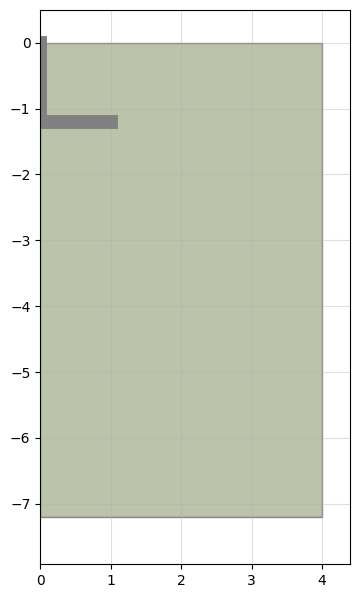

In [6]:
model.plot()

## Test

[Static](test.ipynb#Load-test), [failure](test.ipynb#Failure-test), [safety](test.ipynb#Safety-test), [dynamic loading](test.ipynb#Dynamic-load-test) and [earthquake shake](test.ipynb#Shake-test) tests are available. A static load test is conducted using the ``load_test`` method. The test consist in consecutive load levels being applied to the foundation. Negative loads imply compression, while positive pull-out. Each load level is a phase where the load is set to the provided value.

In [7]:
testid = 'test A'
load = [-60, 0, -60] #kN
model.load_test(testid, load)

Calculation results are stored in a dataframe:

In [8]:
model.results

,test,phase,previous,plx id,previous plx id,location,step,time,sumMstage,SumMsf,...,M,qy0,qy1,qx,agx,agy,Fy target,Fx target,M target,ratchetting
0,None,construction,None,Phase_1,None,top,1.0,None,0.198850,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,False
1,None,construction,None,Phase_1,None,top,2.0,None,0.397699,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,False
2,None,construction,None,Phase_1,None,top,3.0,None,0.596549,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,False
3,None,construction,None,Phase_1,None,top,4.0,None,0.994248,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,False
4,None,construction,None,Phase_1,None,top,5.0,None,1.000000,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,test A,test A_stage_2,test A_stage_1,Phase_4,Phase_3,1.0,121.0,0.0,0.939505,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-56.373698,0.0,0.0,False
2258,test A,test A_stage_2,test A_stage_1,Phase_4,Phase_3,1.0,122.0,0.0,0.953538,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-57.214849,0.0,0.0,False
2259,test A,test A_stage_2,test A_stage_1,Phase_4,Phase_3,1.0,123.0,0.0,0.981585,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-58.896135,0.0,0.0,False
2260,test A,test A_stage_2,test A_stage_1,Phase_4,Phase_3,1.0,124.0,0.0,0.991979,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-59.519203,0.0,0.0,False


By default 6 points are selected surveyed. The load application point at the surface, and points located at the foundation level at a distance of 0, 0.25, 0.5, 0.75 and 1 times b/2. The load test results can be inspected using the ``plot_test`` function.

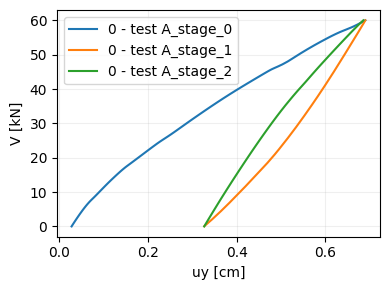

In [9]:
model.plot_test('test A', location=0, legend=True)

Multiple load tests can be performed in the same model.Each load test will start from the construction phase. **

## Save/Load

Saving a model wipes out the Plaxis objects stored in it. This prevents the load test object from further communicating with Plaxis, so no additional can be performed. The information regarding the model geometry, material properties and test results is preserved.

In [10]:
model.save('exmaple_model.mdl')

WARNIGN: Saving the load test to memory whipes out the Plaxis objects. Test results and input parameters will still be avaiable, but no further interaction with Plaxis will be possible. The model can be restored with the <regen> method, but load tests will have to be recalculated to access the results whitin Plaxis.

 Do you whish to proceed: [Y/n] 

The `regen` method regenerates the Plaxis model from a saved model so it can be used to calculate new tests. It can also recalculate the saved tests by setting the argument `test` to `True`. 

In [11]:
model = padtest.load('exmaple_model.mdl')
model.regen(s_i, g_i, g_o, test=True)

## General model settings

The `model_type` argument can be set to `'axisymmetry'` (default) or `'planestrain'`. Also, the title and comments of the model in Plaxis can be set with the `title` and `comments` arguments.

In [12]:
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column,
                      model_type='planestrain', title='plane strain',
                      comments='This is a plane strain model example.')

## Plaxis license

The `license` argument indicates the type of Plaxis license being used: `'advanced'` or `'ultimate'`. Under the* *advanced* license, dynamic calculations cannot be carried out, nor the material properties related to them defined. By default the *ultiamte* license is assumed.

In [13]:
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column, license='advanced')

## Boundary conditions

The `deformation_boundary_condition` argument imposes user defined deformation boundary conditions to the model. A dictionary must be provided with some, or all, of the fields `'XMin'`, `'XMax'`, `'YMin'` or `'YMax'`. Supported values are `"Free"`, `"Normally fixed"`, `"Horizontally fixed"`, `"Vertically fixed"` and `"Fully fixed"`. If a boundary is not specified by the user, the default value is adopted.

The `dynamic_boundary_condtions` argument imposes user defined dynamic boundary conditions to the model to be used in a [dynamic load test](test.ipynb#Dynamic-load-test). A dictionary must be provided with some, or all, of the fields `'XMin'`, `'XMax'`, `'YMin'` or `'YMax'`. Supported values are `"None"` and `"Viscous"`. If a boundary is not specified by the user, the default value is adopted.

The `shake_boundary_condtions` argument imposes user defined dynamic boundary conditions to the model to be used in a [shake test](test.ipynb#Shake-test). A dictionary must be provided with some, or all, of the fields `'XMin'`, `'XMax'`, `'YMin'` or `'YMax'`. Supported values are `"None"`, `"Viscous"` and `"Free-field"`. If a boundary is not specified by the user, the default value is adopted.

In [14]:
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column,
                      deformation_boundary_condition={'XMin':'Fully fixed',
                                                      'YMax':'Horizontally fixed'},
                      dynamic_boundary_condtions={'XMin':'Viscous'})

## Element type

The `element_type` argument controls the type of elements used in the model. It can be set to `'6-Noded'` or `'15-Noded'`. By default, 15-noded elements are used.

In [15]:
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column,
                      element_type='6-Noded')

## Preliminary model check

Waiting for Plaxis to build and run the initial phases can be time consuming only to check that the model has the correct geometry. The `build` attribute controls whether the Plaxis model gets build. By setting it to `False` the geometry can be inspecting with `plot()`.

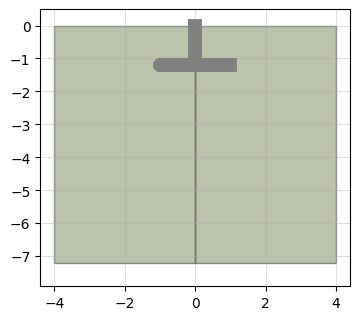

In [16]:
model = padtest.Plate(s_i, g_i, g_o, b, d, soil, footing, column, build=False)
model.plot()

The `build()` method creates the model in Plaxis so it can be used. 

In [17]:
model.build()